<a href="https://colab.research.google.com/github/odontesthes/Intro_Computer_Vision/blob/master/TAREA_PREGUNTA2_2311_2100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install cmake

    100% |████████████████████████████████| 17.7MB 1.9MB/s 


In [0]:
!pip install dlib

    100% |████████████████████████████████| 3.3MB 7.8MB/s 
  Running setup.py bdist_wheel for dlib ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
  Stored in directory: /root/.cache/pip/wheels/ce/f9/bc/1c51cd0b40a2b5dfd46ab79a73832b41e7c3aa918a508154f0
Successfully built dlib


In [0]:
!pip install face_recognition

    100% |████████████████████████████████| 100.2MB 303kB/s 
    100% |████████████████████████████████| 81kB 22.5MB/s 
  Running setup.py bdist_wheel for face-recognition-models ... - \ | / - \ | / done
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [0]:
!pip install imutils

  Running setup.py bdist_wheel for imutils ... - \ done
  Stored in directory: /root/.cache/pip/wheels/4c/ff/aa/824fb9efc5b8c740d54cd8bc19c7e85fbb8d115c77e56812c7
Successfully built imutils


In [0]:
!pip install opencv-python

In [0]:
#importar librerias e imagenes para el algoritmo
from PIL import Image
import numpy as np
import os
from imutils import paths
import face_recognition
import argparse
import pickle
import cv2
import os
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving 00000000.jpg to 00000000.jpg
Saving 00000001.jpg to 00000001.jpg
Saving 00000002.jpg to 00000002.jpg
Saving 00000003.jpg to 00000003.jpg
Saving 00000004.jpg to 00000004.jpg
Saving 00000005.jpg to 00000005.jpg
Saving 00000006.jpg to 00000006.jpg
Saving 00000007.jpg to 00000007.jpg
Saving 00000008.jpg to 00000008.jpg
Saving 00000009.jpg to 00000009.jpg
Saving 00000010.jpg to 00000010.jpg
Saving 00000011.jpg to 00000011.jpg
Saving 00000012.jpg to 00000012.jpg
Saving 00000013.jpg to 00000013.jpg
Saving 00000014.jpg to 00000014.jpg
Saving 00000015.jpg to 00000015.jpg
Saving 00000016.jpg to 00000016.jpg
Saving 00000017.jpg to 00000017.jpg
Saving 00000018.jpg to 00000018.jpg
Saving 00000019.jpg to 00000019.jpg
Saving 00000020.jpg to 00000020.jpg
Saving 00000021.jpg to 00000021.jpg
Saving 00000022.jpg to 00000022.jpg
Saving 00000023.jpg to 00000023.jpg
Saving 00000024.jpg to 00000024.jpg
Saving 00000025.jpg to 00000025.jpg
Saving 00000026.jpg to 00000026.jpg
Saving 00000027.jpg to 00000

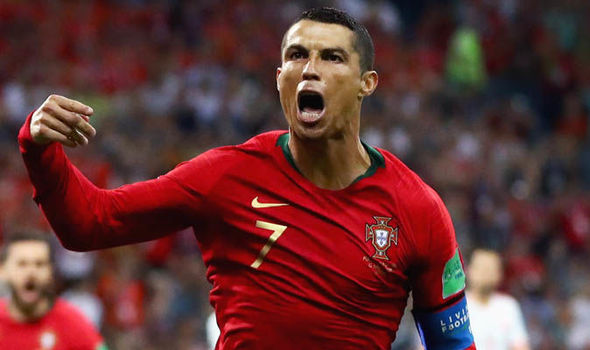

In [0]:
# despliegue de una foto para verificar que estan cargadas.
from IPython.display import Image 
Image(filename='00000008.jpg')


In [0]:
#2.1. Use la librería face_recognition , detecte las caras en cada imagen y genere un vector de características para cada cara. 
#Entregue un archivo que describa el nombre de la imagen, la localización de la cara y el vector de características.


#obtener los directorios de las imagenes
imagePaths = list(paths.list_images('/content'))
imagePaths

['/content/00000006.jpg',
 '/content/00000120.jpg',
 '/content/00000059.jpg',
 '/content/00000095.jpg',
 '/content/00000005.jpg',
 '/content/00000057.jpg',
 '/content/00000001.jpg',
 '/content/00000009.jpg',
 '/content/00000080.jpg',
 '/content/00000086.jpg',
 '/content/00000084.jpg',
 '/content/00000087.jpg',
 '/content/00000010.jpg',
 '/content/00000058.jpg',
 '/content/00000053.jpg',
 '/content/00000100.jpg',
 '/content/00000011.jpg',
 '/content/00000119.jpg',
 '/content/00000002.jpg',
 '/content/00000025.jpg',
 '/content/00000101.jpg',
 '/content/00000024.jpg',
 '/content/00000041.jpg',
 '/content/00000090.jpg',
 '/content/00000103.jpg',
 '/content/00000003.jpg',
 '/content/00000108.jpg',
 '/content/00000039.jpg',
 '/content/00000014.jpg',
 '/content/00000105.jpg',
 '/content/00000008.jpg',
 '/content/00000060.jpg',
 '/content/00000110.jpg',
 '/content/00000124.jpg',
 '/content/00000091.jpg',
 '/content/00000034.jpg',
 '/content/00000016.jpg',
 '/content/00000030.jpg',
 '/content/0

In [0]:
data = []

for (i, imagePath) in enumerate(imagePaths):
    print("Procesando imagen {}/{}".format(i + 1,len(imagePaths)))
    print(imagePath)
    image = cv2.imread(imagePath)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    boxes = face_recognition.face_locations(rgb,model='hog') #Detectando las caras
    
    #Creando los vectores
    encodings = face_recognition.face_encodings(rgb, boxes)

    # Construyendo un diccionario con en el nombre de la imagen, el lugar donde esta la cara y el 
    # vector de caracteristicas
    d = [{"imagePath": imagePath, "loc": box, "encoding": enc}
        for (box, enc) in zip(boxes, encodings)]
    data.extend(d)

Procesando imagen 1/129
/content/00000006.jpg
Procesando imagen 2/129
/content/00000120.jpg
Procesando imagen 3/129
/content/00000059.jpg
Procesando imagen 4/129
/content/00000095.jpg
Procesando imagen 5/129
/content/00000005.jpg
Procesando imagen 6/129
/content/00000057.jpg
Procesando imagen 7/129
/content/00000001.jpg
Procesando imagen 8/129
/content/00000009.jpg
Procesando imagen 9/129
/content/00000080.jpg
Procesando imagen 10/129
/content/00000086.jpg
Procesando imagen 11/129
/content/00000084.jpg
Procesando imagen 12/129
/content/00000087.jpg
Procesando imagen 13/129
/content/00000010.jpg
Procesando imagen 14/129
/content/00000058.jpg
Procesando imagen 15/129
/content/00000053.jpg
Procesando imagen 16/129
/content/00000100.jpg
Procesando imagen 17/129
/content/00000011.jpg
Procesando imagen 18/129
/content/00000119.jpg
Procesando imagen 19/129
/content/00000002.jpg
Procesando imagen 20/129
/content/00000025.jpg
Procesando imagen 21/129
/content/00000101.jpg
Procesando imagen 22/1

In [0]:
with open('encodings.txt', 'w') as f:
    for item in data:
        f.write("%s\n" % item)


In [0]:
# Guardando los vectores en un formato en que no me importa la serializacion
f = open('encodings', "wb")
f.write(pickle.dumps(data))
f.close()



In [0]:
# Abriendo el archivo

data = pickle.loads(open('encodings', "rb").read())
data = np.array(data)
encodings = [d["encoding"] for d in data]
print(encodings)

[array([-0.19741404,  0.19687623,  0.07202001, -0.02675766, -0.1523671 ,
        0.05731681, -0.03098075, -0.09267996,  0.09650829,  0.01579548,
        0.19108477, -0.03948247, -0.26468822,  0.00697769, -0.13138318,
        0.08083298, -0.16327471, -0.12911107, -0.09630159, -0.09724241,
        0.01486655,  0.02605375, -0.01839534,  0.07685167, -0.06104673,
       -0.31366888,  0.02474574, -0.12614158,  0.09619038, -0.16692773,
        0.01031798, -0.01916273, -0.20037207, -0.07343613, -0.08425352,
        0.02090834, -0.04040434, -0.06148342,  0.23245361, -0.03032232,
       -0.17697838, -0.01052134,  0.02319011,  0.3296524 ,  0.21886966,
        0.02395743,  0.02661635, -0.05954155,  0.17323489, -0.26676565,
        0.01934607,  0.17591007,  0.1092409 ,  0.01899832, -0.00235042,
       -0.16625403, -0.01757452,  0.14088124, -0.21141164,  0.10907473,
        0.04296203, -0.10274349,  0.02359354, -0.06099182,  0.19448891,
        0.09768587, -0.02805294, -0.12831366,  0.16786598, -0.1

In [0]:
#2.2. Utilice los vectores de características para agrupar las caras de los
# futbolistas utilizando el algoritmo DBSCAN. Cada grupo corresponderá a
# un futbolista . Si usted conoce a los futbolistas pueden reemplazar los
# típicos IDS generados (0, 1, 2, 3 …) por sus nombres.

stscaler = StandardScaler().fit(encodings)
df = stscaler.transform(encodings)

dbsc = DBSCAN(eps = .5, min_samples = 15).fit(df)
labels = dbsc.labels_
labels



array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

Text(0.5,1,'DBSCAN')

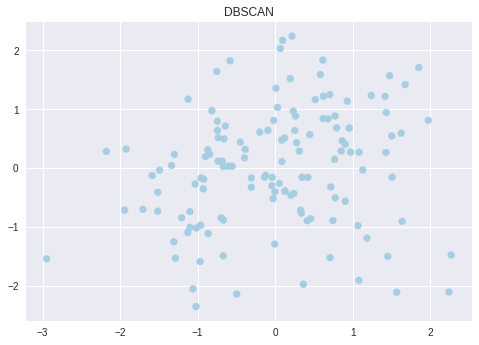

In [0]:
plt.scatter(df[:,0], df[:,-1],c=labels, cmap='Paired')
plt.title("DBSCAN")

In [0]:
#2.3. Indique cuantos futbolistas distintos (numero de clústeres) hay en el
#data set.

clt = DBSCAN(metric="euclidean", n_jobs=-1)
clt.fit(encodings)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=-1, p=None)

In [0]:
# ids de jugadores

labelIDs = np.unique(clt.labels_)
jugadores = len(np.where(labelIDs > -1)[0])
print(labelIDs)


[-1  0  1  2  3]


In [0]:
#numero de jugadores unicos identificados con el algoritmo
print(jugadores)

4


In [0]:
#2.4. Genere una forma de visualizar los clústeres. Para esto extraiga cada cara
#de cada imagen y despliéguela en grupo. Despliegue hasta un máximo de
#9 caras por grupo, ignore el resto. Cambie el tamaño de las imágenes para
#visualizar inteligentemente. Recuerde que el archivo generado en 2.1
#existe la información necesaria.




[INFO] faces for face ID: -1
[INFO] faces for face ID: 0
[INFO] faces for face ID: 1
[INFO] faces for face ID: 2
[INFO] faces for face ID: 3
